<a href="https://colab.research.google.com/github/Liekeverhoeven262/Master-Thesis-Data-Science-Society/blob/main/Feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Construct the path to the file in Google Drive
personal_data_path = '/content/drive/My Drive/Master Thesis/FINAL_personal_data_compact3without.xlsx'
thermal_data_path = '/content/drive/My Drive/Master Thesis/FINAL_scaled_features_df_max.xlsx'

# Load the dataset
personal_data_df = pd.read_excel(personal_data_path)
thermal_data_df = pd.read_excel(thermal_data_path)

In [ ]:
data = pd.merge(thermal_data_df, personal_data_df, on='ID')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, recall_score, precision_score, average_precision_score
from imblearn.over_sampling import SMOTE

In [ ]:
features_with_cluster = ['Left Cheek Sum', 'Left Cheek Variance', 'Left Cheek Standard Deviation', 'Left Cheek Maximum',
            'Left Cheek Minimum', 'Left Cheek Median', 'Left Cheek Mean', 'Left Cheek Mean Absolute Change',
            'Left Cheek Maximum Slope', 'Left Cheek Minimum Slope', 'Right Cheek Sum', 'Right Cheek Variance',
            'Right Cheek Standard Deviation', 'Right Cheek Maximum', 'Right Cheek Minimum', 'Right Cheek Median',
            'Right Cheek Mean', 'Right Cheek Mean Absolute Change', 'Right Cheek Maximum Slope', 'Right Cheek Minimum Slope',
            'Below Nose Sum', 'Below Nose Variance', 'Below Nose Standard Deviation', 'Below Nose Maximum',
            'Below Nose Minimum', 'Below Nose Median', 'Below Nose Mean', 'Below Nose Mean Absolute Change',
            'Below Nose Maximum Slope', 'Below Nose Minimum Slope', 'Between Eyes Sum', 'Between Eyes Variance',
            'Between Eyes Standard Deviation', 'Between Eyes Maximum', 'Between Eyes Minimum', 'Between Eyes Median',
            'Between Eyes Mean', 'Between Eyes Mean Absolute Change', 'Between Eyes Maximum Slope',
            'Between Eyes Minimum Slope', 'Chin Sum', 'Chin Variance', 'Chin Standard Deviation', 'Chin Maximum',
            'Chin Minimum', 'Chin Median', 'Chin Mean', 'Chin Mean Absolute Change', 'Chin Maximum Slope',
            'Chin Minimum Slope', 'Nose Sum', 'Nose Variance', 'Nose Standard Deviation', 'Nose Maximum',
            'Nose Minimum', 'Nose Median', 'Nose Mean', 'Nose Mean Absolute Change', 'Nose Maximum Slope',
            'Nose Minimum Slope', 'VVR1', 'VVR2', 'Cluster']

In [ ]:
# One-hot encode 'Cluster'
data_with_cluster = pd.get_dummies(data, columns=['Cluster'], prefix='Cluster')

# Check new columns
print(data_with_cluster.columns)

Index(['ID', 'Left Cheek Sum', 'Left Cheek Variance',
       'Left Cheek Standard Deviation', 'Left Cheek Maximum',
       'Left Cheek Minimum', 'Left Cheek Median', 'Left Cheek Mean',
       'Left Cheek Mean Absolute Change', 'Left Cheek Maximum Slope',
       'Left Cheek Minimum Slope', 'Right Cheek Sum', 'Right Cheek Variance',
       'Right Cheek Standard Deviation', 'Right Cheek Maximum',
       'Right Cheek Minimum', 'Right Cheek Median', 'Right Cheek Mean',
       'Right Cheek Mean Absolute Change', 'Right Cheek Maximum Slope',
       'Right Cheek Minimum Slope', 'Below Nose Sum', 'Below Nose Variance',
       'Below Nose Standard Deviation', 'Below Nose Maximum',
       'Below Nose Minimum', 'Below Nose Median', 'Below Nose Mean',
       'Below Nose Mean Absolute Change', 'Below Nose Maximum Slope',
       'Below Nose Minimum Slope', 'Between Eyes Sum', 'Between Eyes Variance',
       'Between Eyes Standard Deviation', 'Between Eyes Maximum',
       'Between Eyes Minimum', 'Bet

In [ ]:
# Include new cluster columns in the features list
features_with_cluster = data_with_cluster.columns.difference(['ID', 'Sum2']).tolist()  # Exclude 'ID' and 'Sum2' from features

# Define the target variable
target_with_cluster = 'Sum2'

In [ ]:
# Split the data into training and test sets
X_train_with_cluster, X_test_with_cluster, y_train_with_cluster, y_test_with_cluster = train_test_split(
    data_with_cluster[features_with_cluster], data_with_cluster[target_with_cluster], test_size=0.2, random_state=42)

from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote_with_cluster = SMOTE(random_state=42)
X_train_smote_with_cluster, y_train_smote_with_cluster = smote_with_cluster.fit_resample(X_train_with_cluster, y_train_with_cluster)

From hyperparameter tuning:
Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best parameters: {'colsample_bytree': 0.75, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.75}
Best recall: 0.8923351158645276

In [ ]:
from sklearn.metrics import classification_report, average_precision_score, roc_auc_score

# Setup the optimized XGBoost model using the best parameters from GridSearchCV
optimized_xgb_with_cluster = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.2,
    subsample=0.75,
    colsample_bytree=0.75,
    gamma=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train the model on the balanced training set
optimized_xgb_with_cluster.fit(X_train_smote_with_cluster, y_train_smote_with_cluster)

# Predict on the test data
predictions_optimized_with_cluster = optimized_xgb_with_cluster.predict(X_test_with_cluster)
probabilities_optimized_with_cluster = optimized_xgb_with_cluster.predict_proba(X_test_with_cluster)[:, 1]  # probabilities for the positive class

# Evaluate the model using classification report
print("XGBoost Model Classification Report With Cluster:")
print(classification_report(y_test_with_cluster, predictions_optimized_with_cluster, digits=2))

# Calculate specific metrics
precision_with_cluster = precision_score(y_test_with_cluster, predictions_optimized_with_cluster, pos_label=1)
recall_with_cluster = recall_score(y_test_with_cluster, predictions_optimized_with_cluster, pos_label=1)
auc_pr_with_cluster = average_precision_score(y_test_with_cluster, probabilities_optimized_with_cluster)

# Print specific metrics
print(f'Precisie: {precision_with_cluster:.6f}')
print(f'Recall: {recall_with_cluster:.2f}')
print(f'AUC-PR: {auc_pr_with_cluster:.6f}')

XGBoost Model Classification Report With Cluster:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        43
           1       0.82      0.70      0.76        20

    accuracy                           0.86        63
   macro avg       0.85      0.82      0.83        63
weighted avg       0.85      0.86      0.85        63

Precisie: 0.823529
Recall: 0.70
AUC-PR: 0.792243


## SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 4.8 MB/s eta 0:00:00


In [ ]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

explainer = shap.Explainer(optimized_xgb_with_cluster)

# Bereken SHAP-waarden voor de test set
shap_values = explainer(X_test_with_cluster)

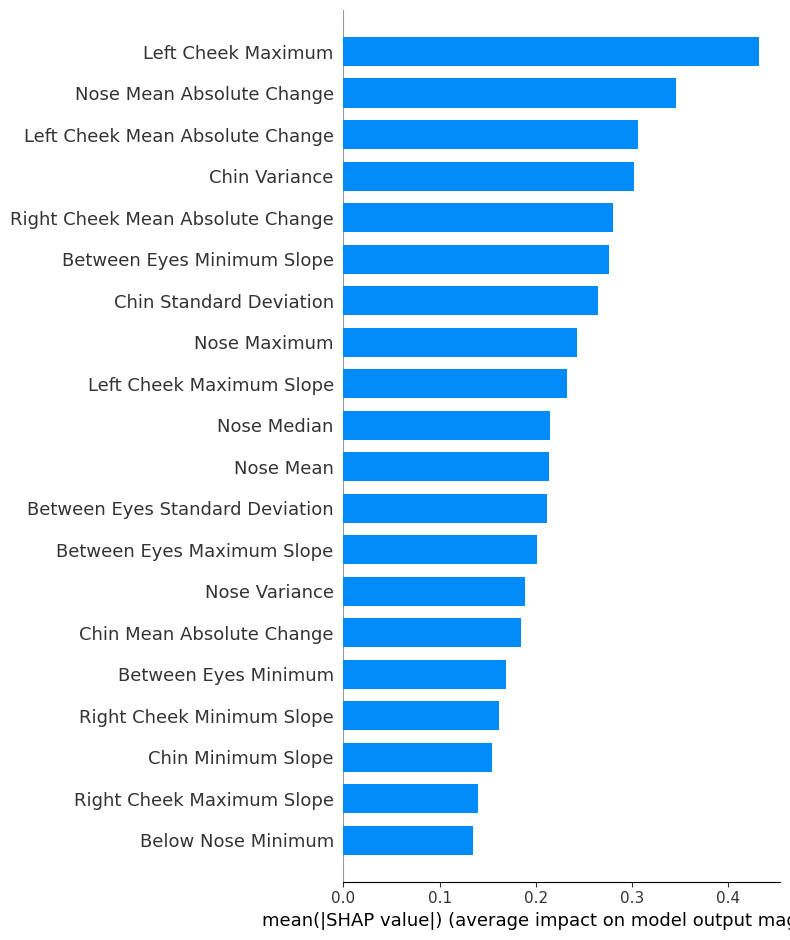

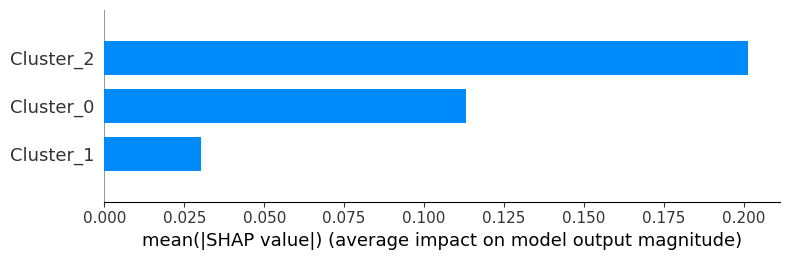

In [ ]:
# Filter de SHAP-waarden voor thermal features
thermal_features = ['Left Cheek Sum', 'Left Cheek Variance', 'Left Cheek Standard Deviation', 'Left Cheek Maximum',
            'Left Cheek Minimum', 'Left Cheek Median', 'Left Cheek Mean', 'Left Cheek Mean Absolute Change',
            'Left Cheek Maximum Slope', 'Left Cheek Minimum Slope', 'Right Cheek Sum', 'Right Cheek Variance',
            'Right Cheek Standard Deviation', 'Right Cheek Maximum', 'Right Cheek Minimum', 'Right Cheek Median',
            'Right Cheek Mean', 'Right Cheek Mean Absolute Change', 'Right Cheek Maximum Slope', 'Right Cheek Minimum Slope',
            'Below Nose Sum', 'Below Nose Variance', 'Below Nose Standard Deviation', 'Below Nose Maximum',
            'Below Nose Minimum', 'Below Nose Median', 'Below Nose Mean', 'Below Nose Mean Absolute Change',
            'Below Nose Maximum Slope', 'Below Nose Minimum Slope', 'Between Eyes Sum', 'Between Eyes Variance',
            'Between Eyes Standard Deviation', 'Between Eyes Maximum', 'Between Eyes Minimum', 'Between Eyes Median',
            'Between Eyes Mean', 'Between Eyes Mean Absolute Change', 'Between Eyes Maximum Slope',
            'Between Eyes Minimum Slope', 'Chin Sum', 'Chin Variance', 'Chin Standard Deviation', 'Chin Maximum',
            'Chin Minimum', 'Chin Median', 'Chin Mean', 'Chin Mean Absolute Change', 'Chin Maximum Slope',
            'Chin Minimum Slope', 'Nose Sum', 'Nose Variance', 'Nose Standard Deviation', 'Nose Maximum',
            'Nose Minimum', 'Nose Median', 'Nose Mean', 'Nose Mean Absolute Change', 'Nose Maximum Slope',
            'Nose Minimum Slope']

thermal_indices = [X_test_with_cluster.columns.get_loc(c) for c in thermal_features if c in X_test_with_cluster]

shap.summary_plot(shap_values[:, thermal_indices], X_test_with_cluster[thermal_features], plot_type="bar")

# Filter de SHAP-waarden voor cluster features
cluster_features = ['Cluster_0', 'Cluster_1', 'Cluster_2']
cluster_indices = [X_test_with_cluster.columns.get_loc(c) for c in cluster_features if c in X_test_with_cluster]

shap.summary_plot(shap_values[:, cluster_indices], X_test_with_cluster[cluster_features], plot_type="bar")

In [ ]:
import pandas as pd
import numpy as np
import shap

# Bereken de gemiddelde absolute SHAP-waarden voor elk kenmerk
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

shap_df = pd.DataFrame({
    'feature': X_test_with_cluster.columns,
    'mean_abs_shap': mean_abs_shap_values
})

# Filter de SHAP-waarden voor thermal features
thermal_features = [
    'Left Cheek Sum', 'Left Cheek Variance', 'Left Cheek Standard Deviation', 'Left Cheek Maximum',
    'Left Cheek Minimum', 'Left Cheek Median', 'Left Cheek Mean', 'Left Cheek Mean Absolute Change',
    'Left Cheek Maximum Slope', 'Left Cheek Minimum Slope', 'Right Cheek Sum', 'Right Cheek Variance',
    'Right Cheek Standard Deviation', 'Right Cheek Maximum', 'Right Cheek Minimum', 'Right Cheek Median',
    'Right Cheek Mean', 'Right Cheek Mean Absolute Change', 'Right Cheek Maximum Slope', 'Right Cheek Minimum Slope',
    'Below Nose Sum', 'Below Nose Variance', 'Below Nose Standard Deviation', 'Below Nose Maximum',
    'Below Nose Minimum', 'Below Nose Median', 'Below Nose Mean', 'Below Nose Mean Absolute Change',
    'Below Nose Maximum Slope', 'Below Nose Minimum Slope', 'Between Eyes Sum', 'Between Eyes Variance',
    'Between Eyes Standard Deviation', 'Between Eyes Maximum', 'Between Eyes Minimum', 'Between Eyes Median',
    'Between Eyes Mean', 'Between Eyes Mean Absolute Change', 'Between Eyes Maximum Slope',
    'Between Eyes Minimum Slope', 'Chin Sum', 'Chin Variance', 'Chin Standard Deviation', 'Chin Maximum',
    'Chin Minimum', 'Chin Median', 'Chin Mean', 'Chin Mean Absolute Change', 'Chin Maximum Slope',
    'Chin Minimum Slope', 'Nose Sum', 'Nose Variance', 'Nose Standard Deviation', 'Nose Maximum',
    'Nose Minimum', 'Nose Median', 'Nose Mean', 'Nose Mean Absolute Change', 'Nose Maximum Slope',
    'Nose Minimum Slope'
]

# Selecteer en sorteer de top 10 thermische kenmerken
top_thermal_shap = shap_df[shap_df['feature'].isin(thermal_features)].sort_values(by='mean_abs_shap', ascending=False).head(10)

# Print de top 10 thermische kenmerken
print("Top 10 Thermal Features by SHAP Value:")
print(top_thermal_shap)

# Filter de SHAP-waarden voor cluster features
cluster_features = ['Cluster_0', 'Cluster_1', 'Cluster_2']

# Selecteer en bekijk de SHAP-waarden voor cluster features
cluster_shap = shap_df[shap_df['feature'].isin(cluster_features)].sort_values(by='mean_abs_shap', ascending=False)

# Print de SHAP-waarden voor cluster features
print("\nSHAP Values for Cluster Features:")
print(cluster_shap)

Top 10 Thermal Features by SHAP Value:
                             feature  mean_abs_shap
33                Left Cheek Maximum       0.432457
46         Nose Mean Absolute Change       0.346049
36   Left Cheek Mean Absolute Change       0.306273
29                     Chin Variance       0.301836
56  Right Cheek Mean Absolute Change       0.279858
16        Between Eyes Minimum Slope       0.275824
27           Chin Standard Deviation       0.265227
43                      Nose Maximum       0.242886
34          Left Cheek Maximum Slope       0.232285
47                       Nose Median       0.214328

SHAP Values for Cluster Features:
      feature  mean_abs_shap
32  Cluster_2       0.201260
30  Cluster_0       0.113025
31  Cluster_1       0.030293


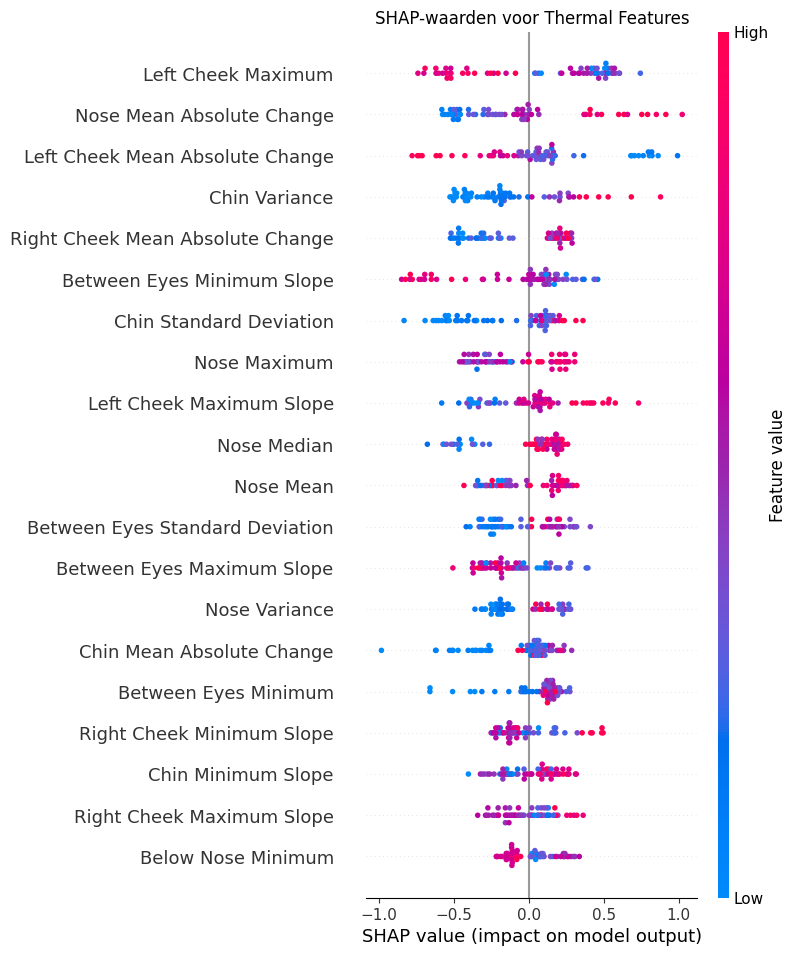

In [ ]:
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values[:, thermal_indices], X_test_with_cluster[thermal_features], plot_type="dot", show=False)
plt.title('SHAP-waarden voor Thermal Features')
plt.show()

/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:962: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  pl.tight_layout()


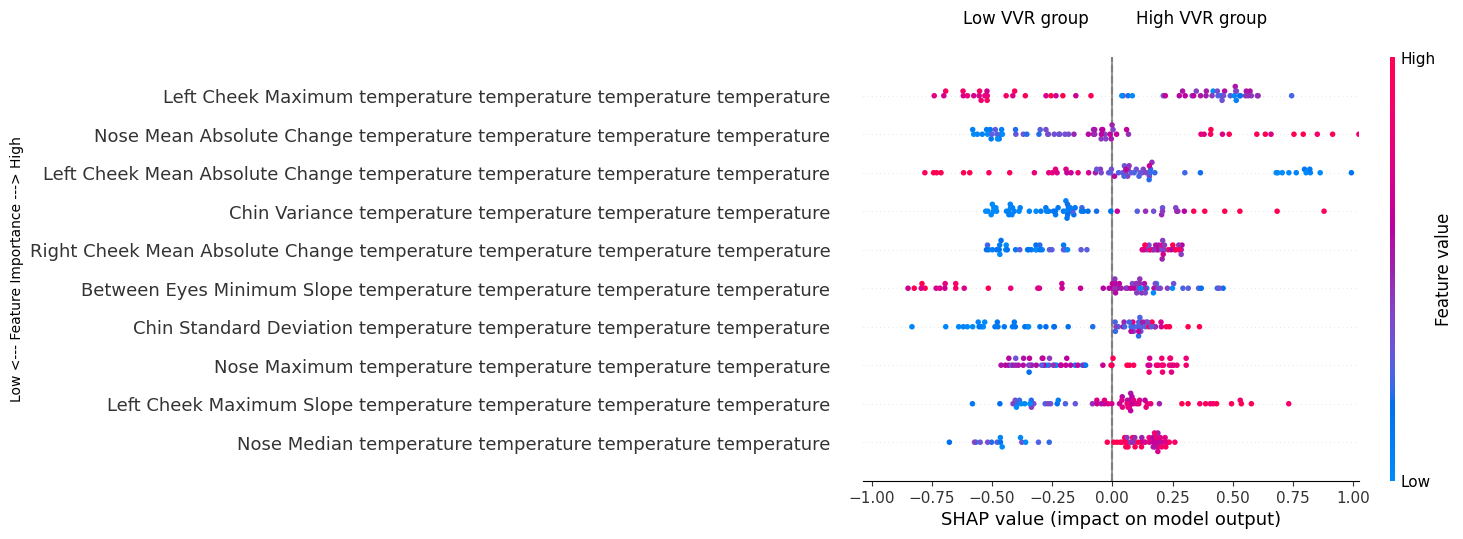

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

top_10_thermal_features = [f"{feature} temperature" for feature in top_10_thermal_features]

# Plot aanmaken
plt.figure(figsize=(16, 8))
shap.summary_plot(shap_values[:, thermal_indices][..., top_10_indices], X_test_with_cluster.iloc[:, thermal_indices].iloc[:, top_10_indices],
                  plot_type="dot", show=False, max_display=10, feature_names=top_10_thermal_features)

# Labels aanpassen
plt.xlabel("SHAP value (impact on model output)")
plt.ylabel("Low <--- Feature Importance ---> High")

# Extra labels voor High en Low VVR group
plt.axvline(x=0, color='grey', linestyle='--')
plt.text(-0.1, 11, 'Low VVR group', verticalalignment='center', horizontalalignment='right', color='black', fontsize=12)
plt.text(0.1, 11, 'High VVR group', verticalalignment='center', horizontalalignment='left', color='black', fontsize=12)

# As aanpassen voor meer spreiding
min_xtick = np.min(shap_values.values[:, thermal_indices][..., top_10_indices])
max_xtick = np.max(shap_values.values[:, thermal_indices][..., top_10_indices])
spread = max_xtick - min_xtick  # Bereken de spreiding van de SHAP-waarden
plt.gca().set_xlim([min_xtick - spread * 0.1, max_xtick + spread * 0.00005])  #extra space

plt.show()

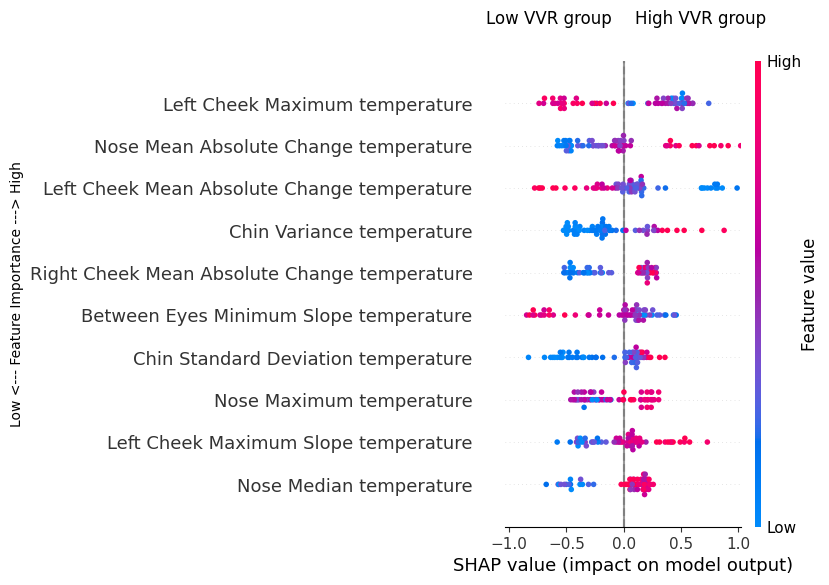

In [ ]:
base_feature_names = ["Left Cheek Maximum", "Nose Mean Absolute Change", "Left Cheek Mean Absolute Change",
                      "Chin Variance", "Right Cheek Mean Absolute Change", "Between Eyes Minimum Slope",
                      "Chin Standard Deviation", "Nose Maximum", "Left Cheek Maximum Slope", "Nose Median"]

# Voeg 'temperature' slechts eenmalig toe
top_10_thermal_features = [f"{feature} temperature" for feature in base_feature_names]

# Plot aanmaken
plt.figure(figsize=(16, 8))
shap.summary_plot(shap_values[:, thermal_indices][..., top_10_indices], X_test_with_cluster.iloc[:, thermal_indices].iloc[:, top_10_indices],
                  plot_type="dot", show=False, max_display=10, feature_names=top_10_thermal_features)

# Labels aanpassen
plt.xlabel("SHAP value (impact on model output)")
plt.ylabel("Low <--- Feature Importance ---> High")

# Extra labels voor High en Low VVR group
plt.axvline(x=0, color='grey', linestyle='--')
plt.text(-0.1, 11, 'Low VVR group', verticalalignment='center', horizontalalignment='right', color='black', fontsize=12)
plt.text(0.1, 11, 'High VVR group', verticalalignment='center', horizontalalignment='left', color='black', fontsize=12)

# As aanpassen voor meer spreiding
min_xtick = np.min(shap_values.values[:, thermal_indices][..., top_10_indices])
max_xtick = np.max(shap_values.values[:, thermal_indices][..., top_10_indices])
spread = max_xtick - min_xtick  # Bereken de spreiding van de SHAP-waarden
plt.gca().set_xlim([min_xtick - spread * 0.1, max_xtick + spread * 0.00005])  #extra space

plt.show()

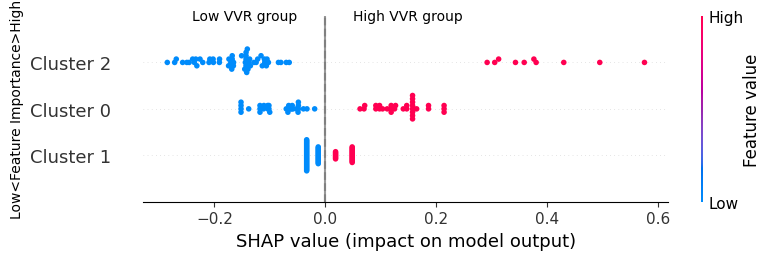

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import shap

# Hernoem de kolommen
X_test_with_cluster.rename(columns={'Cluster_0': 'Cluster 0', 'Cluster_1': 'Cluster 1', 'Cluster_2': 'Cluster 2'}, inplace=True)

# Indices updaten voor cluster features
cluster_features = ['Cluster 0', 'Cluster 1', 'Cluster 2']
cluster_indices = [X_test_with_cluster.columns.get_loc(c) for c in cluster_features]

# Plot aanmaken
plt.figure(figsize=(10, 3))
shap.summary_plot(shap_values[:, cluster_indices], X_test_with_cluster[cluster_features], plot_type="dot", show=False, feature_names=cluster_features)

# Labels aanpassen
plt.xlabel("SHAP value (impact on model output)")
plt.ylabel("Low<Feature Importance>High")

# Extra labels voor High en Low VVR group
plt.axvline(x=0, color='grey', linestyle='--')
plt.text(-0.05, 3, 'Low VVR group', verticalalignment='center', horizontalalignment='right', color='black', fontsize=10)
plt.text(0.05, 3, 'High VVR group', verticalalignment='center', horizontalalignment='left', color='black', fontsize=10)

plt.show()
